In [2]:
%pylab inline
import ismdensgen as ism
reload(ism)

#For timing purposes
import time as tm
import datetime as dt

#Fiddling with maps
from astropy.wcs import WCS
from astropy.io import fits
from astropy.coordinates import Angle
from astropy import units as u
from scipy import stats
import astropy
import ConfigParser

mpl.rcParams['figure.figsize'] = [6.0, 5.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'

Populating the interactive namespace from numpy and matplotlib


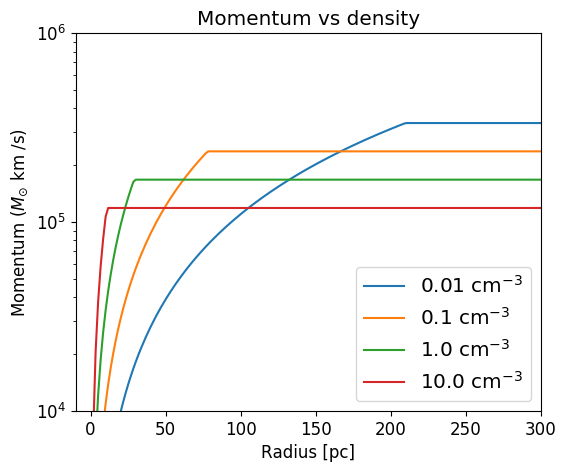

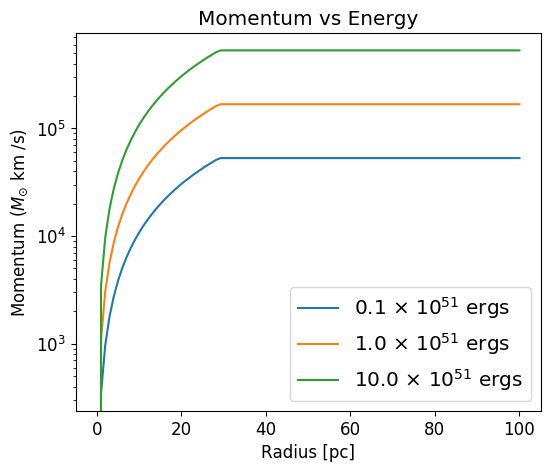

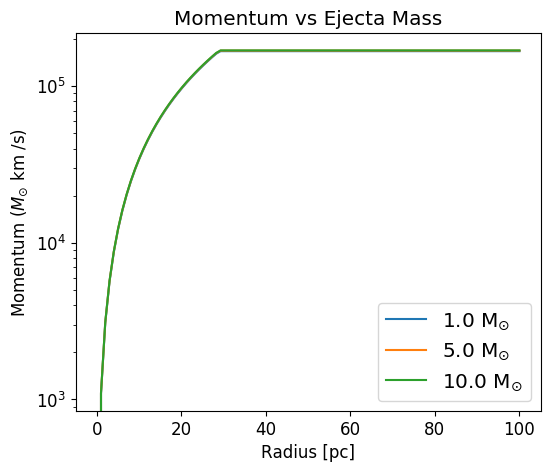

In [9]:
def rad_t(t, nh):
    Z = 1. #Z_sun
    rc = 3.0*(Z**(-0.082))*((nh/100.)**(-0.42))
    tc = 2400.*((nh/100.)**(-0.54))*(Z**(-0.2))

    t_sed = t[np.where(t<tc)]
    t_cool = t[np.where(t>=tc)]
    
    return np.concatenate((rc*(t_sed/tc)**0.4, rc*(t_cool/tc)**0.29))
    
def p0(mej, ekin):
    e_kin = ekin*1.0e51*1.0e-7 #ergs = kg m^2 s^-2
    m_ej = mej*1.989e30 #kg
    return (np.sqrt(2.0*e_kin*m_ej)*(1.0e-3))/1.989e30  #M_sun km/s

def p0_units(mej, ekin):
    return 10028.0*np.sqrt(mej*ekin)

def p_r(r, nh, mej, ekin):
    Z = 1. #Z_sun
    p0 = p0_units(mej, ekin)
    r0 = 0.97*(Z**(0.046))*(mej**0.33)*((nh/100.)**(-0.33)) #Z in solar metallicity, nh in cm^{-3}
    rb = 4.0*(Z**(-0.077))*((nh/100.)**(-0.43))
    
    r_sed = r[np.where(r<rb)]
    r_cool = np.ones(np.where(r>=rb)[0].size)
    
    return np.concatenate((p0*((r_sed/r0)**1.5), p0*((rb/r0)**1.5)*r_cool))
   

rad = np.linspace(0, 500, 300)
#Asymptotic momentum - Eq. 17 
mstar = 100. #Msun
mej = [1., 1., 1., 1.]
e51 = [1., 1., 1., 1.]
n0 = [0.01, 0.1, 1.0, 10.]
unit = r' cm$^{-3}$'
plt.figure()
for i in range(len(n0)): 
    p = p_r(rad, n0[i], mej[i], e51[i])
    pfin = 1420*mstar*((n0[i]/100.)**(-0.16))*np.ones(rad.size)
    plt.plot(rad, p, '-', label = str(n0[i]) + unit)
   # plt.plot(rad, pfin, '--', label = str(n0[i]) + unit)
plt.ylabel(r'Momentum ($M_{\odot}\ \rm{km\ /s}$)')
plt.xlabel('Radius [pc]')
plt.title('Momentum vs density')
plt.yscale('log')
plt.legend(loc=4)
plt.ylim(1.0e4, 1.0e6)
plt.xlim(-10., 300.)
plt.show()

rad = np.linspace(0, 100, 100)
mej = [1.0, 1.0, 1.0]
e51 = [0.1, 1.0, 10.0]
n0 = [1.0, 1.0, 1.0]
unit = r' $\times$ $10^{51}$ ergs'
plt.figure()
for i in range(len(e51)): 
    p = p_r(rad, n0[i], mej[i], e51[i])
    plt.plot(rad, p, '-', label = str(e51[i]) + unit)
plt.ylabel(r'Momentum ($M_{\odot}\ \rm{km\ /s}$)')
plt.title('Momentum vs Energy')
plt.xlabel('Radius [pc]')
plt.yscale('log')
plt.legend(loc=4)
plt.show()

rad = np.linspace(0, 100, 100)
mej = [1.0, 5.0, 10.0]
e51 = [1.0, 1.0, 1.0]
n0 = [1.0, 1.0, 1.0]
unit = r' M$_{\odot}$'
plt.figure()
for i in range(len(mej)): 
    p = p_r(rad, n0[i], mej[i], e51[i])
    plt.plot(rad, p, '-', label = str(mej[i]) + unit)
plt.ylabel(r'Momentum ($M_{\odot}\ \rm{km\ /s}$)')
plt.title('Momentum vs Ejecta Mass')
plt.xlabel('Radius [pc]')
plt.yscale('log')
plt.legend(loc=4)
plt.show()

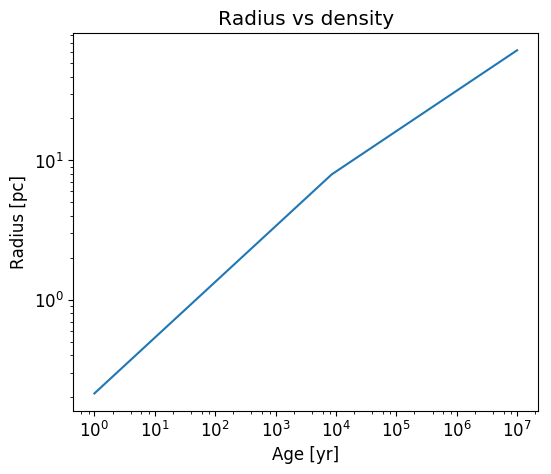

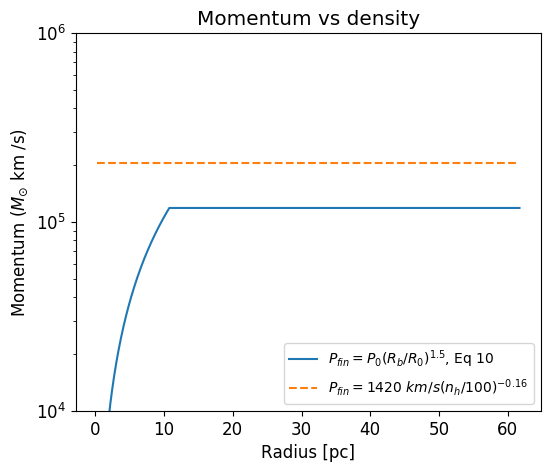

In [5]:
t = np.logspace(0, 7, 400)
#Asymptotic momentum - Eq. 17 

n0 = [10.]
unit = r' cm$^{-3}$'
plt.figure()
for i in range(len(n0)): 
    rad = rad_t(t, n0[i])
    plt.plot(t, rad, '-', label = str(n0[i]) + unit)
    
plt.ylabel(r'Radius [pc]')
plt.xlabel('Age [yr]')
plt.title('Radius vs density')
plt.yscale('log')
plt.xscale('log')
#plt.legend(loc=4)
#plt.ylim(1.0e4, 1.0e6)
plt.show()

if 1:
    mstar = 100 #Msun
    mej = [1.0]
    e51 = [1.0]
    unit = r' cm$^{-3}$'
    plt.figure()

    rad = rad_t(t, n0[i])
    p = p_r(rad, n0[i], mej[i], e51[i])
    pfin = 1420*mstar*((n0[i]/100.)**(-0.16))*np.ones(rad.size)
    plt.plot(rad, p, '-', label = r'$P_{fin} = P_0(R_b/R_0)^{1.5}$, Eq 10')
    plt.plot(rad, pfin, '--', label = r'$P_{fin} = 1420\ km/s (n_h/100)^{-0.16}$')
    plt.ylabel(r'Momentum ($M_{\odot}\ \rm{km\ /s}$)')
    plt.xlabel('Radius [pc]')
    plt.title('Momentum vs density')
    plt.yscale('log')
    plt.legend(loc=4, fontsize=10)
    plt.ylim(1.0e4, 1.0e6)
    plt.show()


In [ ]:
import scipy.stats
z = np.linspace(-400, 400, 500)
p_z = scipy.stats.laplace.pdf(z, loc=0, scale=90)
plt.plot(z, p_z, 'r-')
plt.show()